# HW02: Practice with logistic regression and decision tree

[Name: Michael Raffanti and Net ID: raffanti]

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Use `linear_model.LogisticRegression(C=1000)` so we all get the same results (they vary with `C`).
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species ('virginica' or 'versicolor') for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

Accuracy on the training data: 0.9300
P(Species=virginica | Petal.Length=5): 0.7725
Predicted Species for Petal.Length=5: virginica


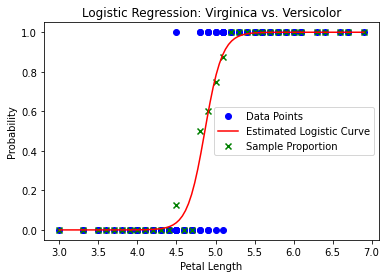

In [2]:
df = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/iris.csv")
filters = df[df["Species"].isin(['virginica', 'versicolor'])][['Petal.Length', 'Species']]

X = filters['Petal.Length'].values.reshape(-1, 1)
y = (filters['Species'] == 'virginica').to_numpy().astype(int)
clf = LogisticRegression(C=1000)
clf.fit(X, y)

accuracy = accuracy_score(y, clf.predict(X))
print(f"Accuracy on the training data: {accuracy:.4f}")

prob = clf.predict_proba([[5]])[0][1]
print(f"P(Species=virginica | Petal.Length=5): {prob:.4f}")

predicted = "virginica" if clf.predict([[5]])[0] else "versicolor"
print(f"Predicted Species for Petal.Length=5: {predicted}")


plt.scatter(filters['Petal.Length'], y, color='blue', label='Data Points')

x_vals = np.linspace(filters['Petal.Length'].min(), filters['Petal.Length'].max(), 100)
y_vals = clf.predict_proba(x_vals.reshape(-1, 1))[:, 1]
plt.plot(x_vals, y_vals, color='red', label='Estimated Logistic Curve')

proportions = filters.groupby('Petal.Length')['Species'].apply(lambda s: (s == 'virginica').mean())
plt.scatter(proportions.index, proportions.values, color='green', marker='x', label='Sample Proportion')
plt.legend()
plt.title('Logistic Regression: Virginica vs. Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Probability')
plt.show()

## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

#### ... your Latex math in a Markdown cell here ...

$\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
   \ln \frac{p}{1 - p} & = \ln \left( \frac{\frac{1}{1 + e^{-(wx + b)}}}{1 - \frac{1}{1 + e^{-(wx + b)}}} \right)\\
    & = \ln \left( \frac{1}{e^{-(wx+b)} + 1 - 1} \right)\\
    & = \ln \left( \frac{1}{e^{-(wx+b)}} \right)\\
    & = \ln(1) - \ln \left( e^{-(wx+b)} \right)\\
    & = - (wx + b) \times \ln(e)\\ 
    & = - (wx + b)\\
    & = \mathbf{w x} + b\\
 \end{align*}
$
### With logistic regression, the log-odds is represented as a positive wx + b

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](https://pages.stat.wisc.edu/~jgillett/451/02/toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

In [3]:
# Answer: 1:D, 2:C, 3:A, 4:B

# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0
5         0       3    male   NaN
6         0       1    male  54.0
Accuracy of tree with max_depth=None: 0.896
Depth of tree: 15
Accuracy of tree with max_depth=2: 0.803


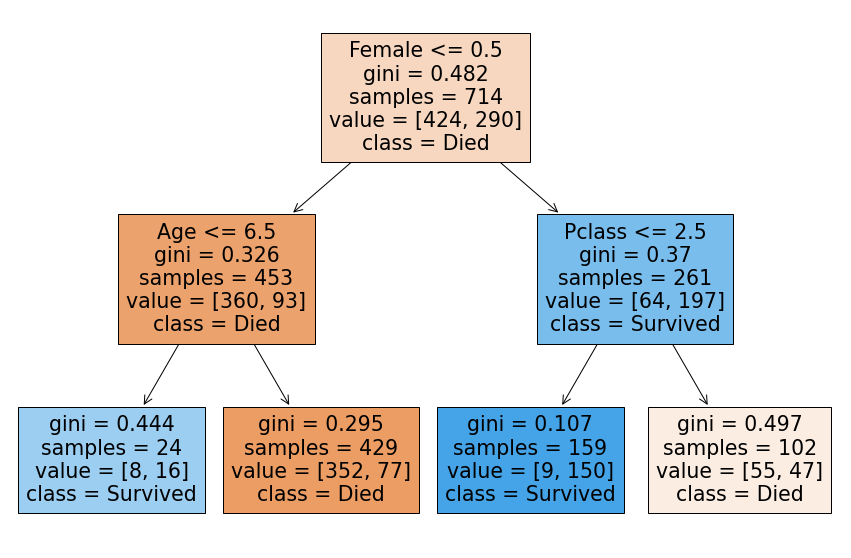

In [4]:
df = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv")[['Survived', 'Pclass', 'Sex', 'Age']]
print(df.head(7))
df = df.dropna()


df['Female'] = (df.Sex == 'female').astype(int)
X = df[['Pclass', 'Age', 'Female']]
y = df['Survived']

clf1 = DecisionTreeClassifier(max_depth=None)
clf1.fit(X, y)
accuracy1 = accuracy_score(y, clf1.predict(X))
print(f"Accuracy of tree with max_depth=None: {accuracy1:.3f}")
print(f"Depth of tree: {clf1.tree_.max_depth}")

clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(X, y)
accuracy2 = accuracy_score(y, clf2.predict(X))
print(f"Accuracy of tree with max_depth=2: {accuracy2:.3f}")

plt.figure(figsize=(15, 10))
plot_tree(clf2, filled=True, feature_names=['Pclass', 'Age', 'Female'], class_names=['Died', 'Survived'])
plt.show()

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

## Features Used in the Decision Tree (max_depth=2)

1. **Female**: This feature tells if the passenger is female (with a value of 1) or not (with a value of 0). Typically, being female affects the survival chances since women and children were given priority to lifeboats on the Titanic.
   
2. **Pclass**: The passenger class is another feature used in the decision tree. The Titanic had three classes, with 1st class being the highest and 3rd class being the lowest. The class could influence survival chances, as 1st class cabins were located in upper decks, which may have made it easier for those passengers to reach lifeboats as well as people tend to prioritize those with more wealth and power.

 ## 2c. What proportion (in the cleaned-up data) of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Survived`
 column for each subset.

In [5]:
female_survival_rate = df[df['Sex'] == 'female']['Survived'].mean()
male_survival_rate = df[df['Sex'] == 'male']['Survived'].mean()

print(f"The female survival rate is {female_survival_rate:.3f}.")
print(f"The male survival rate is {male_survival_rate:.3f}.")

The female survival rate is 0.755.
The male survival rate is 0.205.


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

To find the entropy for the set, we can use the entropy formula:

\[ H(S) = -p_+ \log_2(p_+) - p_- \log_2(p_-) \]

Where:
- \( p_+ \) is the proportion of positive examples in \( S \).
- \( p_- \) is the proportion of negative examples in \( S \).

In [6]:
examples = [((4, 9), 1), ((2, 6), 0), ((5, 7), 0), ((3, 8), 1)]
positive_examples = sum(1 for _, label in examples if label == 1)
negative_examples = len(examples) - positive_examples
p_plus = positive_examples / len(examples)
p_minus = negative_examples / len(examples)
entropy = -p_plus * math.log2(p_plus) if p_plus > 0 else 0
entropy -= p_minus * math.log2(p_minus) if p_minus > 0 else 0
print(entropy)

1.0


 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.

To determine the best (feature, threshold) pair for the given node, we'll assess the potential reduction in entropy for each feature at every potential threshold. I will use the same example tree node points from the previous question.

In [7]:
def find_entropy(subset):
    if not subset:
        return 0
    positive = sum(1 for _, label in subset if label == 1) / len(subset)
    negative = 1 - positive
    if positive == 0 or negative == 0:
        return 0
    return -positive * math.log2(positive) - negative * math.log2(negative)

In [8]:
# Here is a potential split
x1 = set(x[0] for x, _ in examples)
original_entropy = find_entropy(examples)
best_gain = 0
best_feature = None
best_threshold = None

for threshold in x1:
    left_set = [(x, y) for x, y in examples if x[0] <= threshold]
    right_set = [(x, y) for x, y in examples if x[0] > threshold]
    weighted_entropy = (len(left_set) / len(examples)) * find_entropy(left_set) + (len(right_set) / len(examples)) * find_entropy(right_set)
    gain = original_entropy - weighted_entropy
    if gain > best_gain:
        best_gain = gain
        best_feature = 'x1'
        best_threshold = threshold
print(best_gain)        
print(best_feature)
print(best_threshold)

0.31127812445913283
x1
2
